Run the code cell below with the ▶| button above to set up this notebook, or type `SHIFT-ENTER`:

In [1]:
!pip install --no-cache-dir -U -q folium
import pandas as pd
import geojson
import geopy
import numpy as np
import matplotlib.pyplot as plt
import folium
from datascience import *
from IPython.display import HTML, display, IFrame
from folium import plugins
%matplotlib inline
from sklearn import linear_model
from scipy import stats
import os
import ipywidgets as widgets
from soc_module import *
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

from datetime import datetime

# Sociology 130AC Module: "The Neighborhood Project"

Welcome to the data science part of your project! You have gathered data and entered it [here](https://goo.gl/forms/eY1mephilS6VqAT83) from your assigned census tracts.  Now it's time to explore our class data and quantify our observations using Python, a popular programming language used in data science. 

You won't need any prior programming knowledge to do this! The purpose of this module is not to teach you programming, but rather to show you the power of these tools and give you the intuition for how they work. It also allows us to quickly produce summarizations of our data!

## Table of Contents

0 - [Python and Jupyter Notebooks](#jupyter)

1 - [Class Data](#yourdata)

2 - [Our Metrics](#ourmetrics)

3 - [Census Data](#census)

4 - [Correlation](#correlation)

5 - [Regression](#regression)

# Part 0: Introduction to Python and Jupyter Notebooks: <a id='jupyter'></a>

## 1. Cells, Arithmetic, and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [2]:
print("Hello, World!")

Hello, World!


We will now quickly go through some very basic functionality of Python, which we'll be using throughout the rest of this notebook.

### 1.1 Arithmetic
Quantitative information arises everywhere in data science. In addition to representing commands to `print` out lines, expressions can represent numbers and methods of combining numbers. 

The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [3]:
3.2500

3.25

We don't necessarily always need to say "`print`", because Jupyter always prints the last line in a code cell. If you want to print more than one line, though, do specify "`print`".

In [4]:
print(3)
4
5

3


5

Many basic arithmetic operations are built in to Python, like `*` (multiplication), `+` (addition), `-` (subtraction), and `/` (division). There are many others, which you can find information about [here](http://www.inferentialthinking.com/chapters/03/1/expressions.html). Use parenthesis to specify the order of operations, which act according to PEMDAS, just as you may have learned in school. Use parentheses for a happy new year!

In [5]:
2 + (6 * 5 - (6 * 3)) ** 2 * (( 2 ** 3 ) / 4 * 7)

2018.0

### 1.2 Variables

We sometimes want to work with the result of some computation more than once. To be able to do that without repeating code everywhere we want to use it, we can store it in a variable with *assignment statements*, which have the variable name on the left, an equals sign, and the expression to be evaluated and stored on the right. In the cell below, `(3 * 11 + 5) / 2 - 9` evaluates to 10, and gets stored in the variable `result`.

In [6]:
result = (3 * 11 + 5) / 2 - 9

In [7]:
result

10.0

## 2. Functions

    
One important form of an expression is the call expression, which first names a function and then describes its arguments. The function returns some value, based on its arguments. Some important mathematical functions are:

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument                    |
| `max`      | Returns the maximum of all its arguments                      |
| `min`      | Returns the minimum of all its arguments                      |
| `round`    | Round its argument to the nearest integer                     |

Here are two call expressions that both evaluate to 3

```python
abs(2 - 5)
max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))
```

These function calls first evaluate the expressions in the arguments (inside the parentheses), then evaluate the function on the results. `abs(2-5)` evaluates first to `abs(3)`, then returns `3`.

A **statement** is a whole line of code.  Some statements are just expressions, like the examples above, that can be broken down into its subexpressions which get evaluated individually before evaluating the statement as a whole.


### 2.1 Calling functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number.  The absolute value of a number is its distance from 0 on the number line, so `abs(5)` is 5 and `abs(-5)` is also 5.

In [8]:
abs(5)

5

In [9]:
abs(-5)

5

Functions can be called as above, putting the argument in parentheses at the end, or by using "dot notation", and calling the function after finding the arguments, as in the cell immediately below.

In [10]:
nums = [1, 2, 5]  # a list of items, in this case, numbers

In [11]:
nums.reverse()  # reverses the item order
nums

[5, 2, 1]

# Part 1: Class Data<a id='yourdata'></a>

We can read in the data you submitted through the form by asking Google for the form information and turning it into a table. Any of the confusing lines here are just fixing data formats so that Python can better understand our data:

In [12]:
# unique key given by google for the csv
gdoc_key = "12yyTnaNi9JQqCqUqzP42iQDFV2jSiHffliUhrMfS__Y"

# we'll add the key to this url for google docs
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv'.format(gdoc_key)

# now we read in the spreadsheet to python, sum column tallies for column 20
class_data = pd.read_csv(spreadsheet_url)
class_data['Census Tract'] = class_data['Census Tract'].apply(fix_tract)  # fix census tract data type

# rekey yes and no responses
for c in class_data.columns:
    if "Yes" in set(class_data[c]):
        class_data[c] = class_data[c].map({"Yes": 1, "No": 0})

# limit to submissions from Spring 2018
class_data['Timestamp'] = [datetime.strptime(time, '%m/%d/%Y %H:%M:%S') for time in class_data['Timestamp']]
class_data = class_data[[time.year == 2018 for time in class_data['Timestamp']]]
class_data = class_data.reset_index().drop('index', axis = 1)

class_data.head()

,Timestamp,Email Address,Name,Census Tract,"On a scale of 1 - 5, where 1 is ""None"" and 5 is ""A Lot"", how many empty beer or liquor bottles are visible in streets, yards, or alleys?","On a scale of 1 - 5, where 1 is ""None"" and 5 is ""A Lot"", how many cigarette or cigar butts or discarded cigarette packages are on the sidewalk or in the gutters?","On a scale of 1 - 5, where 1 is ""None"" and 5 is ""A Lot"", how many condoms are present on the sidewalk, in the gutters, or street of block face?","On a scale of 1 - 5, where 1 is ""None"" and 5 is ""A Lot"", how much garbage, litter, or broken glass in the street or on the sidewalks?",Are there abandoned cars in the neighborhood? How many do you see?,"On a scale of 1-5 where 1 is ""Friendly Responses / Greetings / Helpful"" and 5 is ""Treated with Suspicion"", How were you regarded by the people in the block face?",...,"Full Address of Block Face in Image #4 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.","Full Address of Block Face in Image #5 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.",Other thoughts or comments for Image #2,Other thoughts or comments for Image #3,Other thoughts or comments for Image #4,Other thoughts or comments for Image #5,Unnamed: 39,City,Zip Code,"Full Address of Block Face (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704."
0,2018-03-24 16:02:07,NaN,Sam Schuder,4229,1,4,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-24 16:16:33,NaN,Samuel Schuder,4229,1,4,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-30 22:59:50,anna-nguyen@berkeley.edu,Anna,4229,1,5,2,3,3,3,...,NaN,NaN,test 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-31 18:41:05,alexandreaoneill@icloud.com,Alexandrea O'Neill,4201,1,1,1,1,0,1,...,"619 San Carlos Ave, Albany, CA 94706",n/a,Home for sale,Father taking his two young children for a stroll,Typical looking home in the neighborhood,n/a,NaN,NaN,NaN,NaN
4,2018-04-02 21:54:04,alexfigueroa@berkeley.edu,Alexandria Figueroa,4010,2,2,1,2,0,1,...,"4222 Market Street, Emeryville, CA 94608","4201 West Street, Emeryville CA 94608",There is a notice on a fenced off lot that abo...,This house has a faded white fence that has gr...,There was a tobacco product wrapper in front o...,This graffiti and trash was right in front of ...,NaN,NaN,NaN,NaN


That's a lot of columns! Now that our data is inside the `class_data` variable, we can ask that varible for some information. We can get a list of the column names with the `.columns` attribute of the table:

In [13]:
class_data.columns

Index(['Timestamp', 'Email Address', 'Name', 'Census Tract',
       'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot", how many empty beer or liquor bottles are visible in streets, yards, or alleys? ',
       'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot",  how many cigarette or cigar butts or discarded cigarette packages  are on the sidewalk or in the gutters? ',
       'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot",  how many condoms are present on the sidewalk, in the gutters, or street of block face? ',
       'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot", how much garbage, litter, or broken glass in the street or on the sidewalks? ',
       ' Are there abandoned cars in the neighborhood? How many do you see? ',
       'On a scale of 1-5 where 1 is "Friendly Responses / Greetings / Helpful" and 5 is "Treated with Suspicion", How were you regarded by the people in the block face?',
       'On a scale of 1 - 4, where 1 is "Very well kept / good c

Let's clean up the data a little bit. We can use '.drop' to remove extra columns and '.rename' to create shorter labels for our columns

In [14]:
class_data = class_data.iloc[:, 0:-3].drop([
    'House Number', 
    'What drinking establishments are on the block face? (check all that apply)',
    'What kind of signs are visible? (check all that apply)',
    'Are there any recreational facilities on the block face?',
    'Other thoughts or comments',
    'Unnamed: 39'
    ], axis = 1)

class_data = class_data.rename(columns= {
    'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot", how many empty beer or liquor bottles are visible in streets, yards, or alleys? ': 'Amount of Visible Empty Liquor Bottles [Scale: 1 (None) to 5 (A Lot)]', 
    'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot",  how many cigarette or cigar butts or discarded cigarette packages  are on the sidewalk or in the gutters? ': 'Amount of Visible Cigarette Debris [Scale: 1 (None) to 5 (A Lot)]',
    'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot",  how many condoms are present on the sidewalk, in the gutters, or street of block face? ': 'Amount of Visible Condoms [Scale: 1 (None) to 5 (A Lot)]',
    'On a scale of 1 - 5, where 1 is "None" and 5 is "A Lot", how much garbage, litter, or broken glass in the street or on the sidewalks? ': 'Amount of Visible Trash [Scale: 1 (None) to 5 (A Lot)]',
    'On a scale of 1-5 where 1 is "Friendly Responses / Greetings / Helpful" and 5 is "Treated with Suspicion", How were you regarded by the people in the block face?': 'Attitude of Residents [Scale: 1 (Friendly and Helpful) to 5 (Suspicious)]',
    'On a scale of 1 - 4, where 1 is "Very well kept / good condition" and 4 is "Poor / badly deteriorated condition", in general, how would you rate the condition of buildings on the block face? (includes residential buildings, recreational facilities, manufacturing plants, business / industrial headquarters, etc)' : 'Condition of Buildings [Scale: 1 (Well Kept) to 4 (Poor)]',
    'On a scale of 1 - 4, where 1 is "No fencing" and 4 is "High mesh fencing with barbed wire or spiked tops", is there fencing and what kind? (includes all property)': 'Presence of Fencing [Scale: 1 (No fencing) to 4 (High mesh with barbed wire or spiked tops)]',
    'On a scale of 1-3, where 1 is "Few or none" and 3 is a "Most/all of it", how many trees are linking the street of the block face? ': 'Amount of street linked with trees [Scale: 1 (None or Few) to 3 (Most or All)]',
    'Full Address of Block Face in Image #1 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.': 'Full Address of Photo #1 Location',
    'Full Address of Block Face in Image #2 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.': 'Full Address of Photo #2 Location',
    'Full Address of Block Face in Image #3 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.': 'Full Address of Photo #3 Location',
    'Full Address of Block Face in Image #4 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.': 'Full Address of Photo #4 Location',
    'Full Address of Block Face in Image #5 (Street Number, Street Name, City, State, Zip Code). E.g.: 2128 Oxford Street, Berkeley, CA, 94704.': 'Full Address of Photo #5 Location',
})

class_data.head()

,Timestamp,Email Address,Name,Census Tract,Amount of Visible Empty Liquor Bottles [Scale: 1 (None) to 5 (A Lot)],Amount of Visible Cigarette Debris [Scale: 1 (None) to 5 (A Lot)],Amount of Visible Condoms [Scale: 1 (None) to 5 (A Lot)],Amount of Visible Trash [Scale: 1 (None) to 5 (A Lot)],Are there abandoned cars in the neighborhood? How many do you see?,Attitude of Residents [Scale: 1 (Friendly and Helpful) to 5 (Suspicious)],...,Image #5,Image #4,Full Address of Photo #2 Location,Full Address of Photo #3 Location,Full Address of Photo #4 Location,Full Address of Photo #5 Location,Other thoughts or comments for Image #2,Other thoughts or comments for Image #3,Other thoughts or comments for Image #4,Other thoughts or comments for Image #5
0,2018-03-24 16:02:07,NaN,Sam Schuder,4229,1,4,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-24 16:16:33,NaN,Samuel Schuder,4229,1,4,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-30 22:59:50,anna-nguyen@berkeley.edu,Anna,4229,1,5,2,3,3,3,...,NaN,NaN,"2086 University Ave Berkeley, CA 94704",NaN,NaN,NaN,test 2,NaN,NaN,NaN
3,2018-03-31 18:41:05,alexandreaoneill@icloud.com,Alexandrea O'Neill,4201,1,1,1,1,0,1,...,NaN,https://drive.google.com/open?id=1oATH16E2obUw...,"San Carlos Ave and Thousand Oaks Blvd, Albany,...","San Carlos Ave and Portland Ave, Albany, CA","619 San Carlos Ave, Albany, CA 94706",n/a,Home for sale,Father taking his two young children for a stroll,Typical looking home in the neighborhood,n/a
4,2018-04-02 21:54:04,alexfigueroa@berkeley.edu,Alexandria Figueroa,4010,2,2,1,2,0,1,...,https://drive.google.com/open?id=1CBPu0GLKLQnT...,https://drive.google.com/open?id=1bl45qyrDitJR...,"869 43rd street, Emeryville, CA,94608","832 42nd Street, Emeryville, CA 94608","4222 Market Street, Emeryville, CA 94608","4201 West Street, Emeryville CA 94608",There is a notice on a fenced off lot that abo...,This house has a faded white fence that has gr...,There was a tobacco product wrapper in front o...,This graffiti and trash was right in front of ...


Here are the new column labels!

In [15]:
class_data.columns

Index(['Timestamp', 'Email Address', 'Name', 'Census Tract',
       'Amount of Visible Empty Liquor Bottles [Scale: 1 (None) to 5 (A Lot)]',
       'Amount of Visible Cigarette Debris [Scale: 1 (None) to 5 (A Lot)]',
       'Amount of Visible Condoms [Scale: 1 (None) to 5 (A Lot)]',
       'Amount of Visible Trash [Scale: 1 (None) to 5 (A Lot)]',
       ' Are there abandoned cars in the neighborhood? How many do you see? ',
       'Attitude of Residents [Scale: 1 (Friendly and Helpful) to 5 (Suspicious)]',
       'Condition of Buildings [Scale: 1 (Well Kept) to 4 (Poor)]',
       'Is there graffiti or evidence of graffiti that has been painted over on buildings, signs, or walls? (Questions 22-23)',
       'Presence of Fencing [Scale: 1 (No fencing) to 4 (High mesh with barbed wire or spiked tops)]',
       'Are any commercial/residential buildings being renovated?',
       'Amount of street linked with trees [Scale: 1 (None or Few) to 3 (Most or All)]',
       'Is there public transpor

We can ask for the total number of observations (rows) by just using the `len` function:

In [16]:
len(class_data)

19

Let's get some summary statistics and do some plotting.

How many of you reported on which census tracts?

In [17]:
class_data['Census Tract'].value_counts()

4229    3
4007    3
4010    2
4224    2
4027    2
4205    1
4028    1
4005    1
4214    1
4235    1
4033    1
4201    1
Name: Census Tract, dtype: int64


We can use the `.plot.barh()` method to this to visualize the counts:

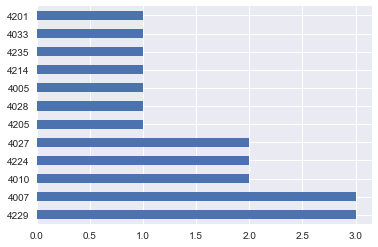

In [18]:
class_data['Census Tract'].value_counts().plot.barh()

We can write a short function, `bar_chart_column`, to plot the counts for any of our columns in the table. All we have to do is move the slider:

In [19]:
def bar_chart_column(column_num):
    bar_chart_data[bar_chart_data.columns[column_num]].value_counts().plot.barh()
    plt.title(bar_chart_data.columns[column_num])

## Removes student identification information, drop questions with checkboxes
bar_chart_data = class_data.iloc[:, 3:21].drop(
    'What kinds of establishments are there on the block face? Select all that apply.',
    axis = 1)

slider = widgets.IntSlider(min=0, max=14,step=1,value=0)
display(widgets.interactive(bar_chart_column, column_num=slider))

A Jupyter Widget

Some of the charts are small because there is so much text, try double-clicking the image to increase the size.

We can then ask for these columns and plot their means too. Again, you'll have to double click to zoom in:

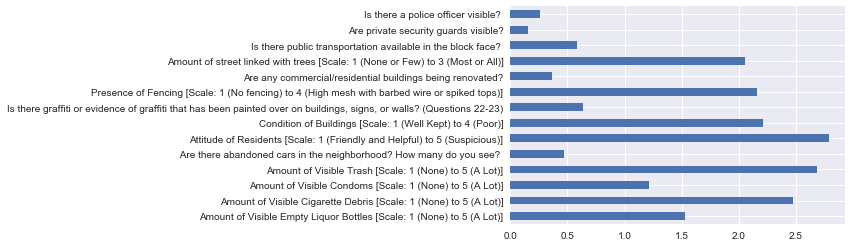

In [20]:
class_data.iloc[:, 4:22].mean().plot.barh()

A question had checkbox answers that we can also look at:

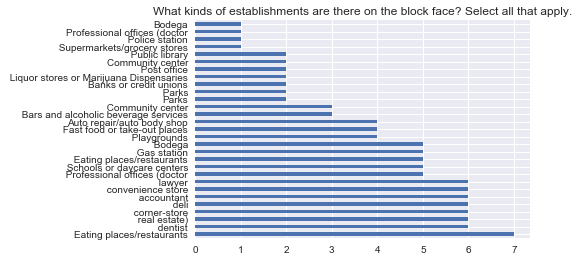

In [21]:
establishments = [item for sublist in [response.split(',') for response in class_data.iloc[:, 18]] for item in sublist]
pd.DataFrame(establishments)[0].value_counts().plot.barh()
plt.title(class_data.columns[18])

---

## Mapping

We can also visualize how your responses mapped out over the census tracts. We'll use a library called `folium` to map your observations onto a map of the census tracts, and include popups with your comments and photos.

In [22]:
alameda = geojson.load(open("data/alameda-2010.geojson"))
myMap = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)

map_data(myMap, alameda, class_data).save("map1.html")
IFrame('map1.html', width=700, height=400)

GeocoderQuotaExceeded: The given key has gone over the requests limit in the 24 hour period or has submitted too many requests in too short a period of time.

Click around census tracts near yours to see if the other students' observations are similar and see if you can eyeball any trends. Check out other areas on the map and see if there are trends for tracts in specific areas. Do specific characteristics cluster in different areas? Which ones? Which characteristsics seem to cluster together? What types of data do you think will correlate with socioeconomic characteristics like median income, poverty rate, education?  Why?

---

# Part 2: Our Metrics<a id='ourmetrics'></a>

Now that you have made some predictions, we can compare our data with socioeconomic data from the U.S. Census for the different tracts we visited and see if we can find evidence to support them. From your data, we can create some point scales that measure different aspects of a neighborhood.

For example, we can make a scale called “social disorder” for the first part of your responses. Let's first subeset our data:

In [ ]:
social_disorder = class_data.iloc[:, 3:13]
social_disorder.head()

Now we'll need to scale the values because all responses were not on the same scale. But for this part, the higher the value the more negative the social disorder was:

In [ ]:
social_disorder = scale_values(social_disorder, list(range(1,10)))
social_disorder.head()

Now that our values are scaled, we can take the mean across all observation for a given census tract for a given column, and then take the mean across columns:

In [ ]:
social_disorder = pd.DataFrame(social_disorder.groupby("Census Tract").mean().mean(axis=1))
social_disorder.columns = ["Social Disorder"]
social_disorder

Remember, the higher the value the more negative we perceived the census tract to be.

We can do the same for our amenities part:

In [24]:
amenities = class_data.iloc[:, [3] + list(range(13,19))]
amenities.head()

,Census Tract,Are any commercial/residential buildings being renovated?,Amount of street linked with trees [Scale: 1 (None or Few) to 3 (Most or All)],Is there public transportation available in the block face?,Are private security guards visible?,Is there a police officer visible?,What kinds of establishments are there on the block face? Select all that apply.
0,4229,0,2,1,1,1,"Banks or credit unions, Bars and alcoholic bev..."
1,4229,0,2,1,1,1,"Banks or credit unions, Bars and alcoholic bev..."
2,4229,1,2,0,1,1,Auto repair/auto body shop
3,4201,0,3,0,0,0,"Parks, Playgrounds, Schools or daycare centers"
4,4010,0,2,1,0,0,"Professional offices (doctor, dentist, lawyer,..."


One of our questions had choices as checkboxes. These were generally good things to have around, so we'll just count the number of checked boxes and divide by the total number of boxes and have that as our observation. We'll scale the values after to make our columns comparable.

In [25]:
def count_checkboxes(response):
    return len(response.split(','))

amenities[amenities.columns[6]]= amenities[amenities.columns[6]].apply(count_checkboxes) / 22
amenities = scale_values(amenities, list(range(1,7)))
amenities.head()

,Census Tract,Are any commercial/residential buildings being renovated?,Amount of street linked with trees [Scale: 1 (None or Few) to 3 (Most or All)],Is there public transportation available in the block face?,Are private security guards visible?,Is there a police officer visible?,What kinds of establishments are there on the block face? Select all that apply.
0,4229,0.0,0.5,1.0,1.0,1.0,1.000000
1,4229,0.0,0.5,1.0,1.0,1.0,1.000000
2,4229,1.0,0.5,0.0,1.0,1.0,0.000000
3,4201,0.0,1.0,0.0,0.0,0.0,0.105263
4,4010,0.0,0.5,1.0,0.0,0.0,0.210526


Again, below, for amenities, a higher value is a more positive census tract.

In [ ]:
amenities = pd.DataFrame(amenities.groupby("Census Tract").mean().mean(axis=1))
amenities.columns = ["Amenities"]
amenities

---

# Part 3: Census Data<a id='census'></a>

Let's read in some data for census tracts from the [American FactFinder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml):

In [ ]:
official_data = pd.DataFrame.from_csv("data/merged-census.csv", index_col=None)
official_data['Census Tract'] = official_data["Census Tract"].apply(fix_tract)
official_data = official_data.set_index("Census Tract")
official_data

We can add our columns to this table to put it all in one place:

In [ ]:
joined_data = official_data.join(social_disorder).join(amenities).reset_index()
joined_data

---

## Mapping Exploration

Before we quantify the relationship between the census data and our own metrics, let's do some exploratory mapping. We can now add our social disorder and amenities metrics to the popup too!

First we'll map a choropleth of unemployment:

In [31]:
mapa = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
choropleth_overlay(mapa=mapa, column_name="Unemployment %", joined=joined_data, alameda=alameda, obs_data=class_data).save("map2.html")
IFrame('map2.html', width=700, height=400)

Household Median Income:

In [ ]:
mapb = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
choropleth_overlay(mapa=mapb, column_name="Household Median Income", joined=joined_data, alameda=alameda, obs_data=class_data).save("map3.html")
IFrame('map3.html', width=700, height=400)

Bachelor's Degree or higher %:

In [ ]:
mapc = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
choropleth_overlay(mapa=mapc, column_name="Bachelor's Degree or higher %", joined=joined_data, alameda=alameda, obs_data=class_data).save("map4.html")
IFrame('map4.html', width=700, height=400)

Now our "social disorder":

In [ ]:
mapd = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
choropleth_overlay(mapa=mapd, column_name="Social Disorder", joined=joined_data, alameda=alameda, obs_data=class_data).save("map5.html")
IFrame('map5.html', width=700, height=400)

And finally "amenities":

In [ ]:
mapa = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
choropleth_overlay(mapa=mapa, column_name="Amenities", joined=joined_data, alameda=alameda, obs_data=class_data).save("map6.html")
IFrame('map6.html', width=700, height=400)

What do you notice?

Try copying and pasting one of the mapping cells above and change the `column_name` variable to a different variable (column in our data) you'd like to map, then run the cell!

---

## Variable Distributions

We can also visualize the distributions of these variables according to census tract with [histograms](https://en.wikipedia.org/wiki/Histogram). A histogram will create bins, or ranges, within a variable and then count up the frequency for that bin. If we look at household median income, we may have bins of $10,000, and then we'd count how many tracts fall within that bin:

In [ ]:
def viz_dist(var_name, tract):
    x = joined_data[var_name].dropna()
    reindexed = joined_data.set_index("Census Tract")
    
    plt.hist(x)
    plt.axvline(x=reindexed.loc[tract, var_name], color = "RED")
    plt.xlabel(var_name, fontsize=18)
    plt.show()

display(widgets.interactive(viz_dist, var_name=list(joined_data.columns[1:]), tract=list(joined_data["Census Tract"])))

What do these distributions tell you?

---


# Part 4: Correlation<a id='correlation'></a>

Let's first analyze income levels. We have sorted the data according to income level. Compare the income levels to the level of social disorder and amenities. Is there a correlation you can spot(as one increases or decreases, does the other do the same)?

In [ ]:
joined_data.sort_values("Household Median Income", ascending=False)[["Household Median Income", "Social Disorder", "Amenities"]]

Did you look at the whole table? A common mistake is to assume that since the top 10 results follow or do not follow a pattern, the rest don't. Real life data is often messy and not clean. Does the correlation continue throughout the whole table (a.k.a. as income decreases the points decrease) or is there no pattern? What does this mean about the data?

---

Eyeballing patterns is not the same as a statisical measure of a correlation; you must quantify it with numbers and statistics to prove your thoughts. Looking at the tables is not a very statistical measure of how much a variable correlates to the results. What does it mean for a variable "income" to match 7 out of the top 15 social disorder points? Does this correlate to the rest of the results? How well does it correlate? 

### The correlation coefficient - *r*

> The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia

*r* = 1: the scatter diagram is a perfect straight line sloping upwards

*r* = -1: the scatter diagram is a perfect straight line sloping downwards.

Let's calculate the correlation coefficient between acceleration and price. We can use the `corr` method to generate a correlation matrix of our `joined_data`:

In [ ]:
joined_data.corr()

You'll notice that the matrix is mirrored with a `1.000000` going down the diagonal. This matrix yields the correlation coefficient for each variable to every other variable in our data.

For example, if we look at the `Social Disorder`, we see that there is a `.487102` correlation, implying that there is a strong positive relationship between our constructed social disorder variable and the unemployment rate (i.e., as one goes up the other goes up too). What else do you notice?

---



# Part 5: Regression<a id='regression'></a>

We will now use a method called linear regression to make a graph that will show the best fit line that correlates to the data. The slope of the line will show whether it is positively correlated or negatively correlated. The code that we've created so far has helped us establish a relationship between our two variables. Once a relationship has been established, it's time to create a model of the data. To do this we'll find the equation of the **regression line**!

The regression line is the **best fit** line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! Below is a picture showing the best fit line.

![image](http://onlinestatbook.com/2/regression/graphics/gpa.jpg)

As you can infer from the picture, once we find the **slope** and the **y-intercept** we can start predicting values! The equation for the above regression to predict university GPA based on high school GPA would look like this:

$UNIGPA_i= \alpha + \beta HSGPA + \epsilon_i$

The variable we want to predict (or model) is the left side `y` variable, the variable which we think has an influence on our left side variable is on the right side. The $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

We can set up a visualization to choose which variables we want as `x` and `y` and then plot the line of best fit:

In [ ]:
def f(x_variable, y_variable):
    
    if "median house value" in [x_variable, y_variable]:
        drop_na = joined_data.dropna()  # if not all census tracts have measure
        x = drop_na[x_variable]
        y = drop_na[y_variable]
        
    else:
        x = joined_data[x_variable]
        y = joined_data[y_variable]
    
    plt.scatter(x, y)
    plt.xlabel(x_variable, fontsize=18)
    plt.ylabel(y_variable, fontsize=18)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r") #calculate line of best fit
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) #gets the r_value
    print("R-squared: ", r_value**2)
    
display(widgets.interactive(f, x_variable=list(joined_data)[1:], y_variable=list(joined_data)[1:]))

***Note:*** The `R-squared` tells us how much of the variation in the data can be explained by our model.

Why is this a better method than just sorting tables? First of all, we are now comparing all of the data in the graph to the variable, rather than comparing what our eyes glance quickly over. It shows a more complete picture than just saying "There are some similar results in the top half of the sorted data". Second of all, the graph gives a more intuitive sense to see if your variable does match the data. You can quickly see if the data points match up with the regression line. Lastly, the r-squared value will give you a way to quantify how good the variable is to explain the data.

One of the beautiful things about computer science and statistics is that you do not need to reinvent the wheel. You don't need to know how to calculate the `R-squared` value, or draw the regression line; someone has already implemented it! You simply need to tell the computer to calculate it. However, if you are interested in these mathematical models, take a data science or statistics course!

---

***Please fill out our [feedback form](https://goo.gl/forms/PR1OQvX3bMIfype62)!***